In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
from sklearn import metrics
from loading_data import *

In [83]:
ncg_consumption, gaspool_consumption, the_consumption = read_consumption()
consumption_data = pd.concat([ncg_consumption.add(gaspool_consumption, fill_value=0), the_consumption])

temperature = read_temperatures()

consumption_data_clean = consumption_data.dropna()
temperature_clean = temperature.dropna()

common_index = consumption_data_clean.index.intersection(temperature_clean.index)

consumption_data = consumption_data_clean.loc[common_index]
temperature = temperature_clean.loc[common_index]

In [84]:
# compter les na dans les series
print(consumption_data.isna().sum())
print(temperature.isna().sum())

0
temperature_2m_max (°C)      0
temperature_2m_min (°C)      0
temperature_2m_mean (°C)     0
sunshine_duration (h)        0
wind_speed_10m_max (km/h)    0
dtype: int64


## Diagram temperature & natural gas consumption

In [75]:
consumption_data.loc["2018/01/01":].corr(temperature["temperature_2m_mean (°C)"].loc["2018/01/01":])

np.float64(-0.9179922956114716)

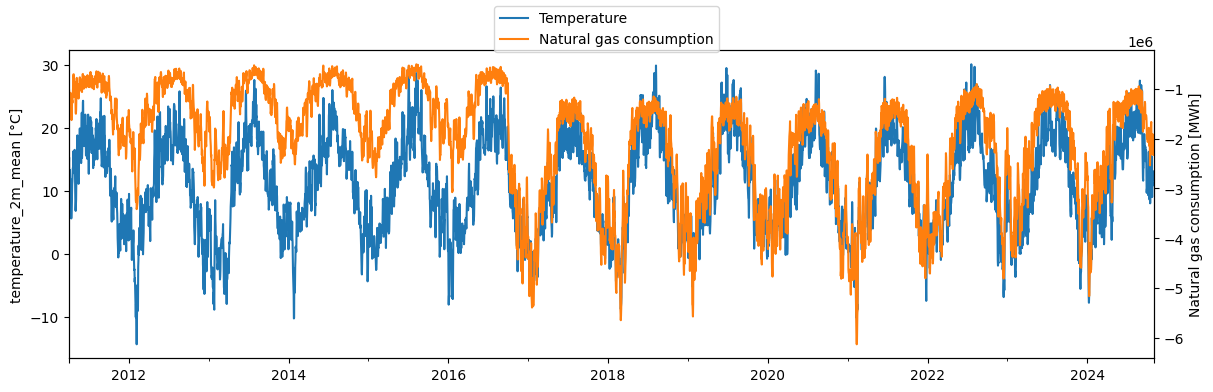

In [56]:
import os

fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()

# For both, only show data in 2021 and 2022
temperature["temperature_2m_mean (°C)"].plot(ax=ax1, color="tab:blue")
(consumption_data * -1).plot(ax=ax2, color="tab:orange") # Invert the consumption axis

# Labels and legend
ax1.set_ylabel("temperature_2m_mean [°C]")
ax2.set_ylabel("Natural gas consumption [MWh]")

# Legend for both plots in one
fig.legend(
    labels=["Temperature", "Natural gas consumption"],

    loc="upper center",
)

# Create directory if it does not exist
os.makedirs("diagrams", exist_ok=True)

# Save plot
fig.savefig("diagrams/data_analysis_003_001.svg", format="svg", bbox_inches="tight")

<Axes: ylabel='Frequency'>

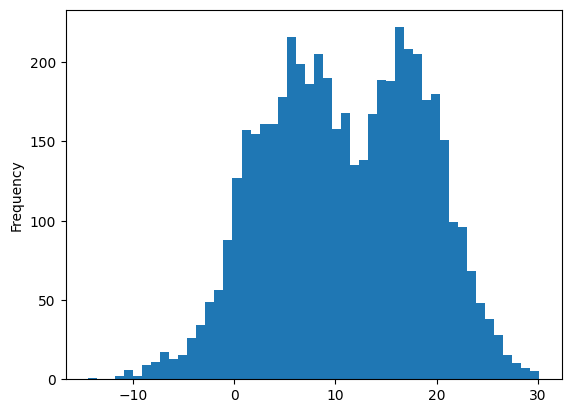

In [67]:
temperature["temperature_2m_mean (°C)"].plot.hist(bins=50)

In [64]:
consumption_data

2011-04-01    1233962.960
2011-04-02    1006977.403
2011-04-03    1025128.699
2011-04-04    1334227.003
2011-04-05    1362010.627
                 ...     
2024-10-27    1914459.771
2024-10-28    2186914.778
2024-10-29    2330071.796
2024-10-30    2312481.125
2024-10-31    2256990.688
Length: 4963, dtype: float64

## Regression analysis

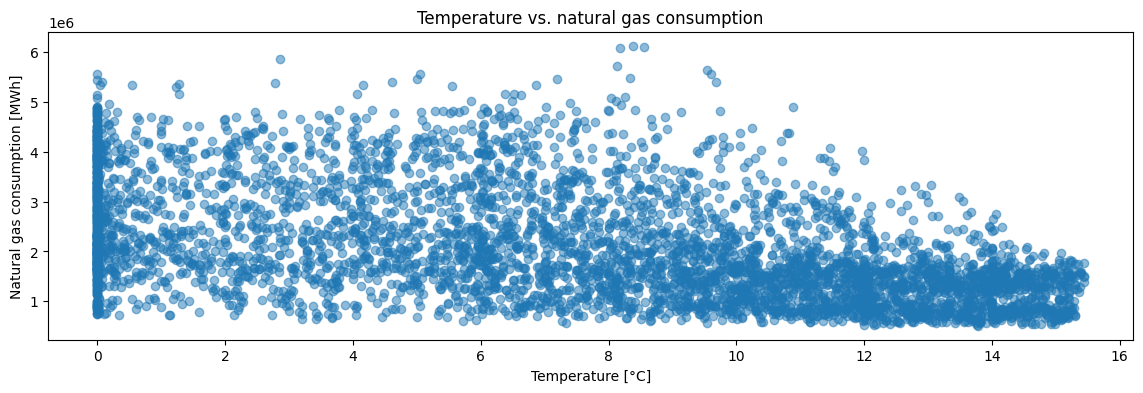

In [70]:
# Scatter plot of temperature and natural gas consumption
fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(temperature["sunshine_duration (h)"], consumption_data, alpha=0.5) 

# Labels and legend
ax.set_xlabel("Temperature [°C]")
ax.set_ylabel("Natural gas consumption [MWh]")
ax.set_title("Temperature vs. natural gas consumption")

# Save plot
fig.savefig("diagrams/data_analysis_003_003.svg", format="svg", bbox_inches="tight")

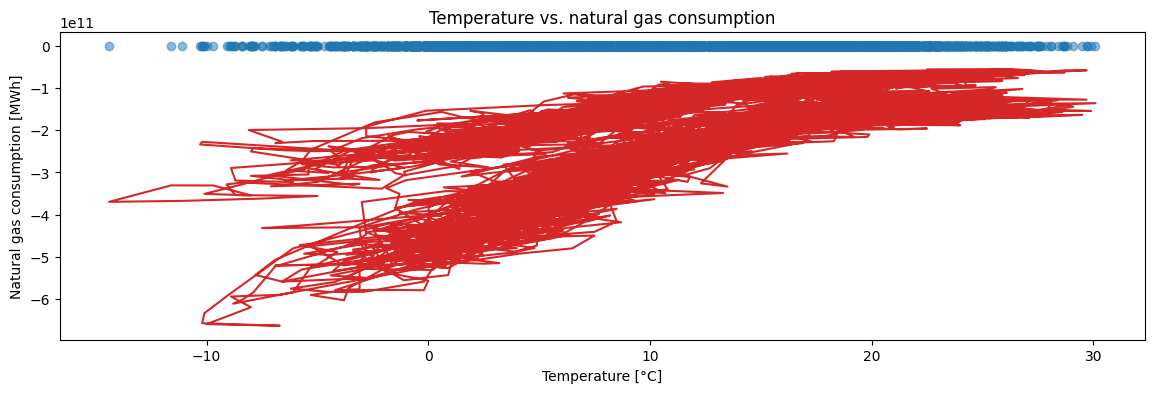

In [60]:
linear_regression = stats.linregress(temperature["temperature_2m_mean (°C)"], consumption_data)

# Plot linear regression
regression_y = linear_regression.slope * consumption_data + linear_regression.intercept

# Scatter plot of temperature and natural gas consumption
fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(temperature["temperature_2m_mean (°C)"], consumption_data, alpha=0.5)

# Plot linear regression
ax.plot(temperature["temperature_2m_mean (°C)"], regression_y, color="tab:red")

# Labels and legend
ax.set_xlabel("Temperature [°C]")
ax.set_ylabel("Natural gas consumption [MWh]")
ax.set_title("Temperature vs. natural gas consumption")

# Save plot
fig.savefig("diagrams/data_analysis_003_004.svg", format="svg", bbox_inches="tight")
